In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from xgboost import XGBClassifier
from sklearn.metrics import r2_score,accuracy_score,f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('ggplot')    # make the plots more readable and visually appealing

In [3]:
df=pd.read_csv(r"C:\Users\shivam srivastava\Downloads\kidney_disease.csv")

# Step 1: Exploratory Data Analysis (EDA)

In [4]:
df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [5]:
df.classification.value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [6]:
# Rename columns for easier aunderstanding
df.columns = ['id','age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 
              'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 
              'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 
              'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 
              'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class'] # renaming columns

In [7]:
df.shape

(400, 26)

In [8]:
df.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [10]:
df.describe()

id         age  blood_pressure  specific_gravity     albumin  \
count  400.000000  391.000000      388.000000        353.000000  354.000000   
mean   199.500000   51.483376       76.469072          1.017408    1.016949   
std    115.614301   17.169714       13.683637          0.005717    1.352679   
min      0.000000    2.000000       50.000000          1.005000    0.000000   
25%     99.750000   42.000000       70.000000          1.010000    0.000000   
50%    199.500000   55.000000       80.000000          1.020000    0.000000   
75%    299.250000   64.500000       80.000000          1.020000    2.000000   
max    399.000000   90.000000      180.000000          1.025000    5.000000   

            sugar  blood_glucose_random  blood_urea  serum_creatinine  \
count  351.000000            356.000000  381.000000        383.000000   
mean     0.450142            148.036517   57.425722          3.072454   
std      1.099191             79.281714   50.503006          5.741126   
min      0.000000             22.000000    1.500000          0.400000   
25%      0.000000             99.000000   27.000000          0.900000   
50%      0.000000            121.000000   42.000000          1.300000   
75%      0.000000            163.000000   66.000000          2.800000   
max      5.000000            490.000000  391.000000         76.000000   

           sodium   potassium  haemoglobin  
count  313.000000  312.000000   348.000000  
mean   137.528754    4.627244    12.526437  
std     10.408752    3.193904     2.912587  
min      4.500000    2.500000     3.100000  
25%    135.000000    3.800000    10.300000  
50%    138.000000    4.400000    12.650000  
75%    142.000000    4.900000    15.000000  
max    163.000000   47.000000    17.800000

In [11]:
df=df.drop(columns='id',axis=1)

In [12]:
df.shape

(400, 25)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [14]:
df['packed_cell_volume']=pd.to_numeric(df['packed_cell_volume'],errors='coerce')
df['white_blood_cell_count']=pd.to_numeric(df['white_blood_cell_count'],errors='coerce')
df['red_blood_cell_count']=pd.to_numeric(df['red_blood_cell_count'],errors='coerce')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [16]:
# list of columns in numerical and object
cat_cols=[col for col in df.columns if df[col].dtype=='object']
num_cols=[col for col in df.columns if df[col].dtype!='object']

In [17]:
len(num_cols)+len(cat_cols)   # checking count  

25

In [18]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()}")

red_blood_cells has [nan 'normal' 'abnormal']
pus_cell has ['normal' 'abnormal' nan]
pus_cell_clumps has ['notpresent' 'present' nan]
bacteria has ['notpresent' 'present' nan]
hypertension has ['yes' 'no' nan]
diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease has ['no' 'yes' '\tno' nan]
appetite has ['good' 'poor' nan]
peda_edema has ['no' 'yes' nan]
aanemia has ['no' 'yes' nan]
class has ['ckd' 'ckd\t' 'notckd']


In [19]:
for i in df.columns:
    print(df[i].unique)

<bound method Series.unique of 0      48.0
1       7.0
2      62.0
3      48.0
4      51.0
       ... 
395    55.0
396    42.0
397    12.0
398    17.0
399    58.0
Name: age, Length: 400, dtype: float64>
<bound method Series.unique of 0      80.0
1      50.0
2      80.0
3      70.0
4      80.0
       ... 
395    80.0
396    70.0
397    80.0
398    60.0
399    80.0
Name: blood_pressure, Length: 400, dtype: float64>
<bound method Series.unique of 0      1.020
1      1.020
2      1.010
3      1.005
4      1.010
       ...  
395    1.020
396    1.025
397    1.020
398    1.025
399    1.025
Name: specific_gravity, Length: 400, dtype: float64>
<bound method Series.unique of 0      1.0
1      4.0
2      2.0
3      4.0
4      2.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: albumin, Length: 400, dtype: float64>
<bound method Series.unique of 0      0.0
1      0.0
2      3.0
3      0.0
4      0.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: su

In [20]:
# to show unique values in each column 
for col in cat_cols:
    print(f'{col} has {df[col].unique()}')

red_blood_cells has [nan 'normal' 'abnormal']
pus_cell has ['normal' 'abnormal' nan]
pus_cell_clumps has ['notpresent' 'present' nan]
bacteria has ['notpresent' 'present' nan]
hypertension has ['yes' 'no' nan]
diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease has ['no' 'yes' '\tno' nan]
appetite has ['good' 'poor' nan]
peda_edema has ['no' 'yes' nan]
aanemia has ['no' 'yes' nan]
class has ['ckd' 'ckd\t' 'notckd']


In [21]:
# data cleaning

df['diabetes_mellitus']=df['diabetes_mellitus'].replace({'\tno':'no','\tyes':'yes',' yes':'yes'})
df['coronary_artery_disease']=df['coronary_artery_disease'].replace({'\tno':'no'})
df['class']=df['class'].replace({'ckd\t':'ckd','notckd':'not ckd'})

In [22]:
for col in cat_cols:
    print(f'{col} has {df[col].unique()}')

red_blood_cells has [nan 'normal' 'abnormal']
pus_cell has ['normal' 'abnormal' nan]
pus_cell_clumps has ['notpresent' 'present' nan]
bacteria has ['notpresent' 'present' nan]
hypertension has ['yes' 'no' nan]
diabetes_mellitus has ['yes' 'no' nan]
coronary_artery_disease has ['no' 'yes' nan]
appetite has ['good' 'poor' nan]
peda_edema has ['no' 'yes' nan]
aanemia has ['no' 'yes' nan]
class has ['ckd' 'not ckd']


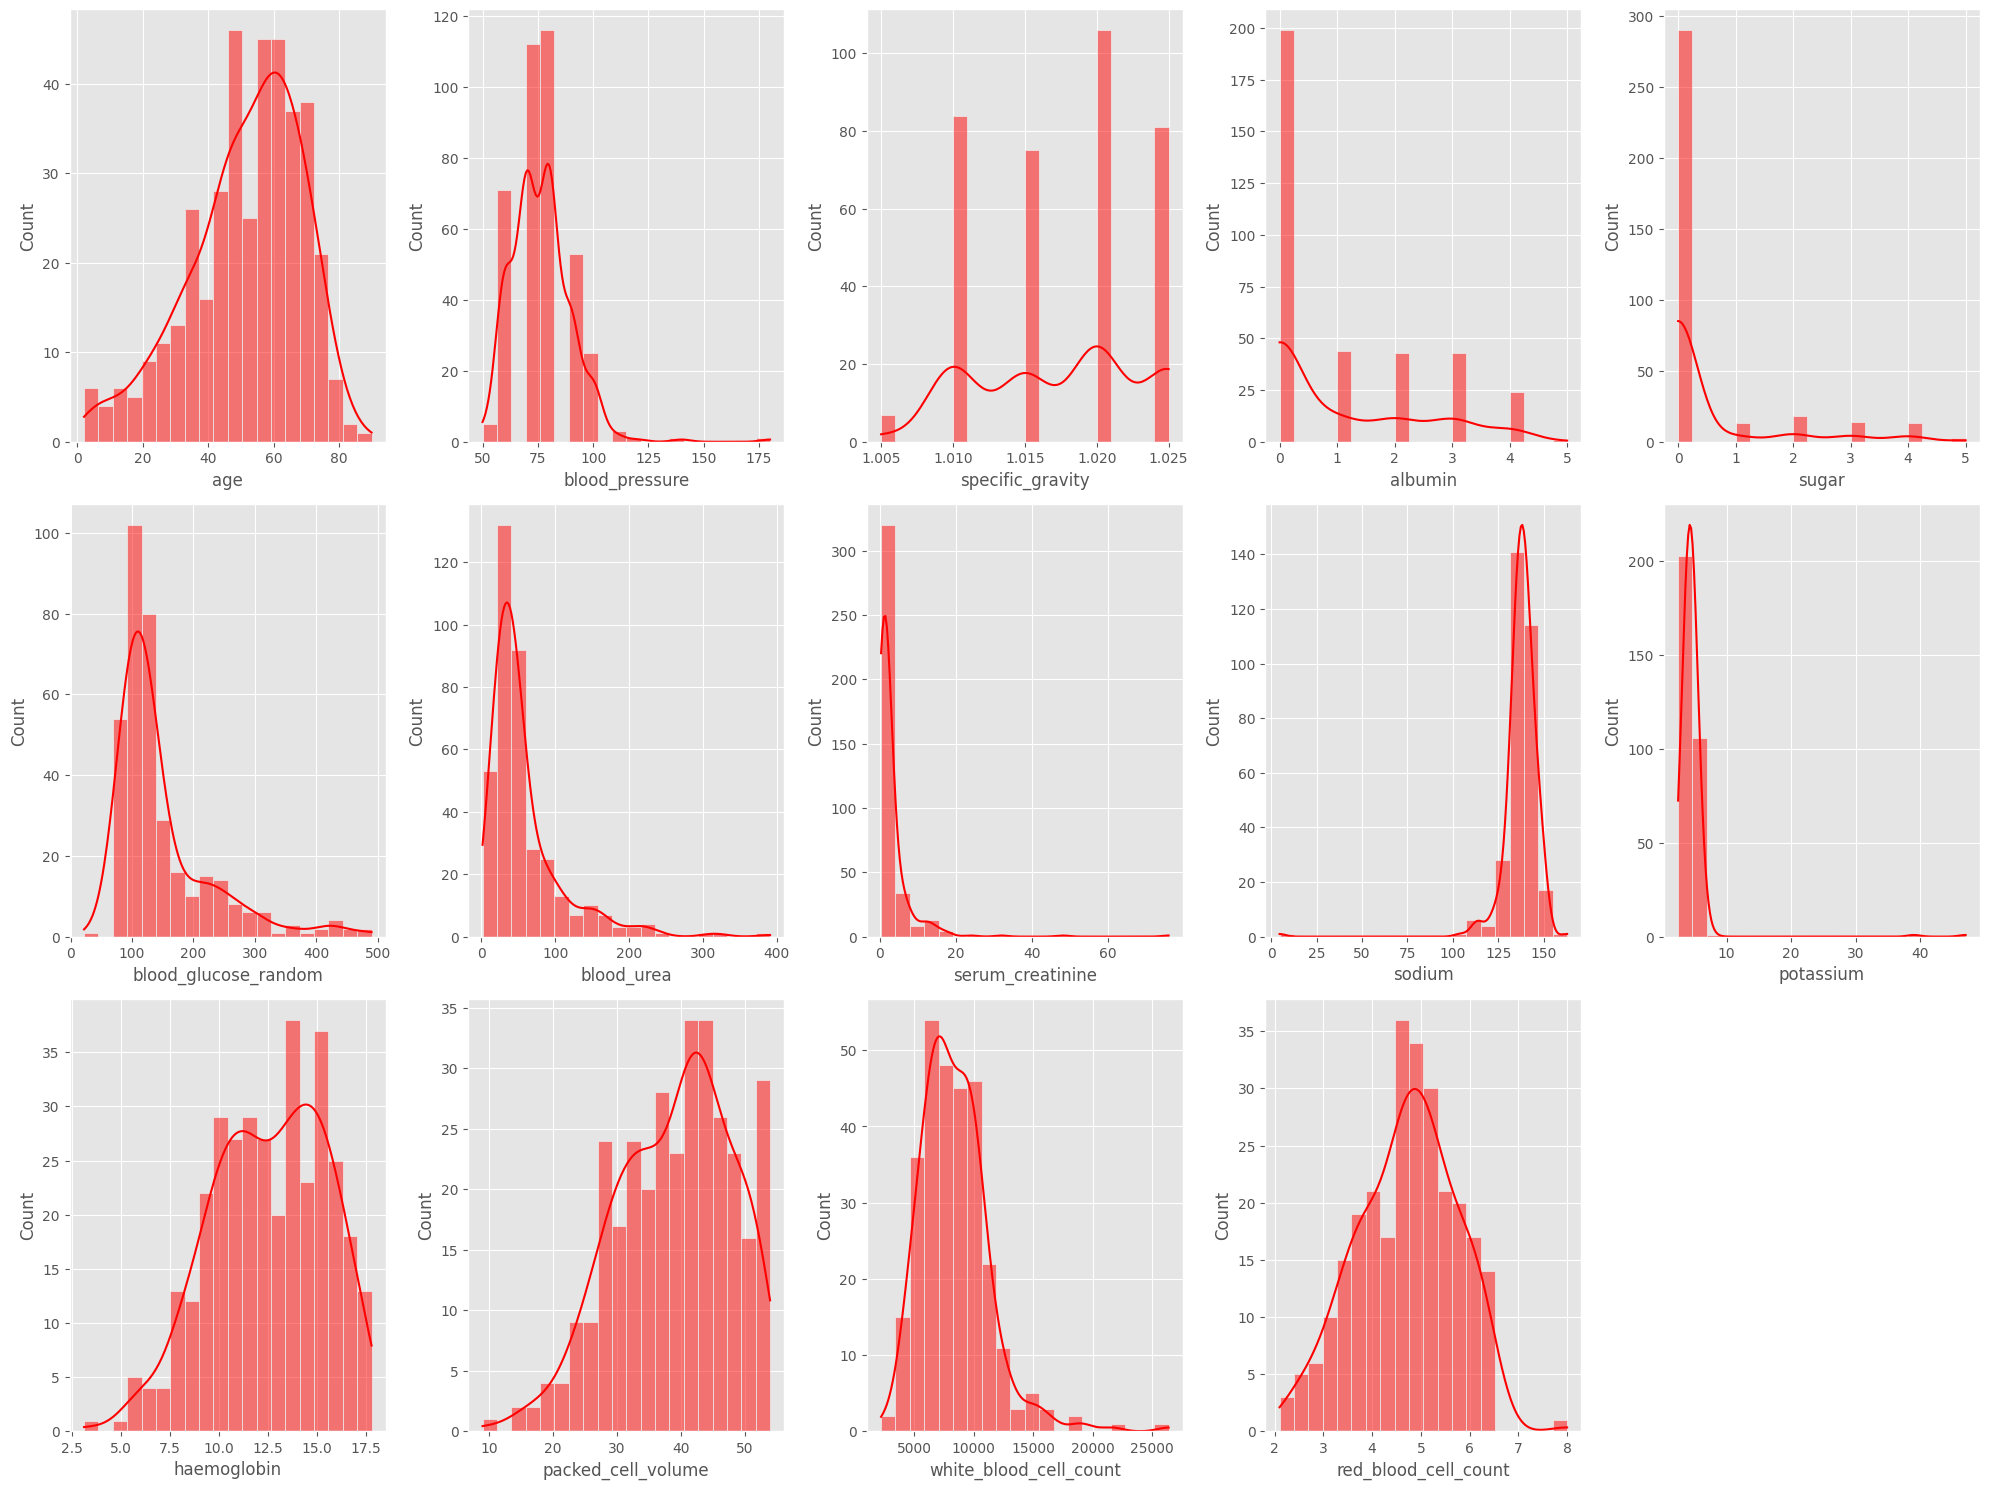

In [23]:
plt.figure(figsize=(20,15))
pt=1

for column in num_cols:
    ax=plt.subplot(3,5,pt)
    sns.histplot(df[column],bins=20,ax=ax,kde=True,color='red')
    ax.set_xlabel(column)
    pt+=1
plt.tight_layout()
plt.show()

In [24]:
#To check distribution is normal or not by pvalue>=0.05 then normal
from scipy.stats import shapiro
normality_results={}

for column in num_cols:
    clean_data=df[column].dropna() # removing null values and making  cleandata
    shapiro_test,p_value=shapiro(clean_data)  # shapiro wilktest 
    normality_results[col]=p_value
    print(f'{column}: sw={shapiro_test}, p_value={p_value}')

age: sw=0.9639029114889367, p_value=3.155049297644778e-08
blood_pressure: sw=0.8681503490559113, p_value=1.2313409228428595e-17
specific_gravity: sw=0.8816577276410376, p_value=7.511105213426834e-16
albumin: sw=0.7447639123762586, p_value=5.505137709775377e-23
sugar: sw=0.4680796812968995, p_value=5.4171833666879725e-31
blood_glucose_random: sw=0.7678639193161365, p_value=4.309587713071842e-22
blood_urea: sw=0.7222726556799595, p_value=1.0721529229554324e-24
serum_creatinine: sw=0.3977923839939804, p_value=1.0443480469097894e-33
sodium: sw=0.6051863300448135, p_value=3.7410576559410765e-26
potassium: sw=0.2012289249964233, p_value=2.4627358176265627e-34
haemoglobin: sw=0.9798545767460272, p_value=8.645817119903378e-05
packed_cell_volume: sw=0.9726775249351948, p_value=6.924159381988391e-06
white_blood_cell_count: sw=0.9041545424931915, p_value=1.018745531899288e-12
red_blood_cell_count: sw=0.9880041466200636, p_value=0.024666552196570993


Insights from this test:

The Shapiro-Wilk test value, or test statistic, provides a measure of how close the data distribution is to a normal distribution:

Interpretation of the Test Statistic:
Values closer to 1 indicate that the data closely resembles a normal distribution.
Values closer to 0 suggest the data significantly deviates from normality.
However, while the Shapiro-Wilk statistic gives a general sense of normality, the p-value is the key measure for determining statistical significance. The p-value is used to formally decide whether the deviation from normality is significant, while the test statistic value only indicates the degree of closeness to normality.

p-value < 0.05: The data deviates significantly from a normal distribution (rejecting the null hypothesis of normality).

p-value ≥ 0.05: The data does not deviate significantly from a normal distribution (failing to reject the null hypothesis, so we can consider it approximately normal).

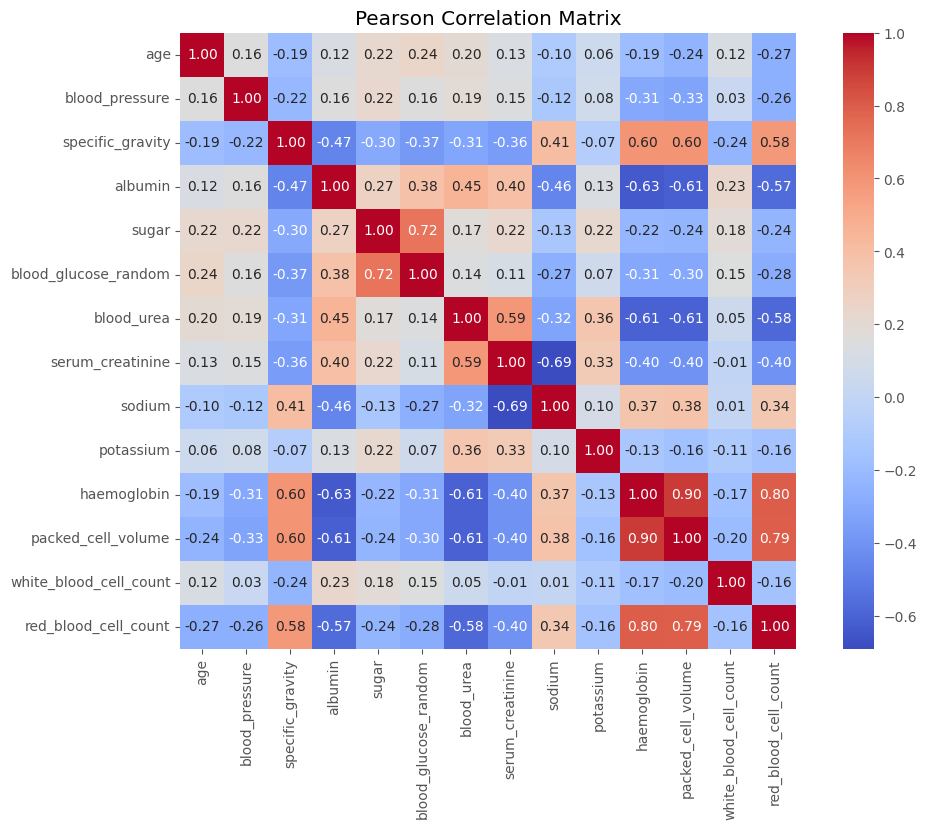

In [25]:
#pearson correlation 
pearson_corr=df[num_cols].corr(method='pearson')
plt.figure(figsize=(12,8))
sns.heatmap(pearson_corr,annot=True,fmt='.2f',cmap='coolwarm',square=True)     # to look square shape each cell
plt.title('Pearson Correlation Matrix')
plt.show()


In [26]:
df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

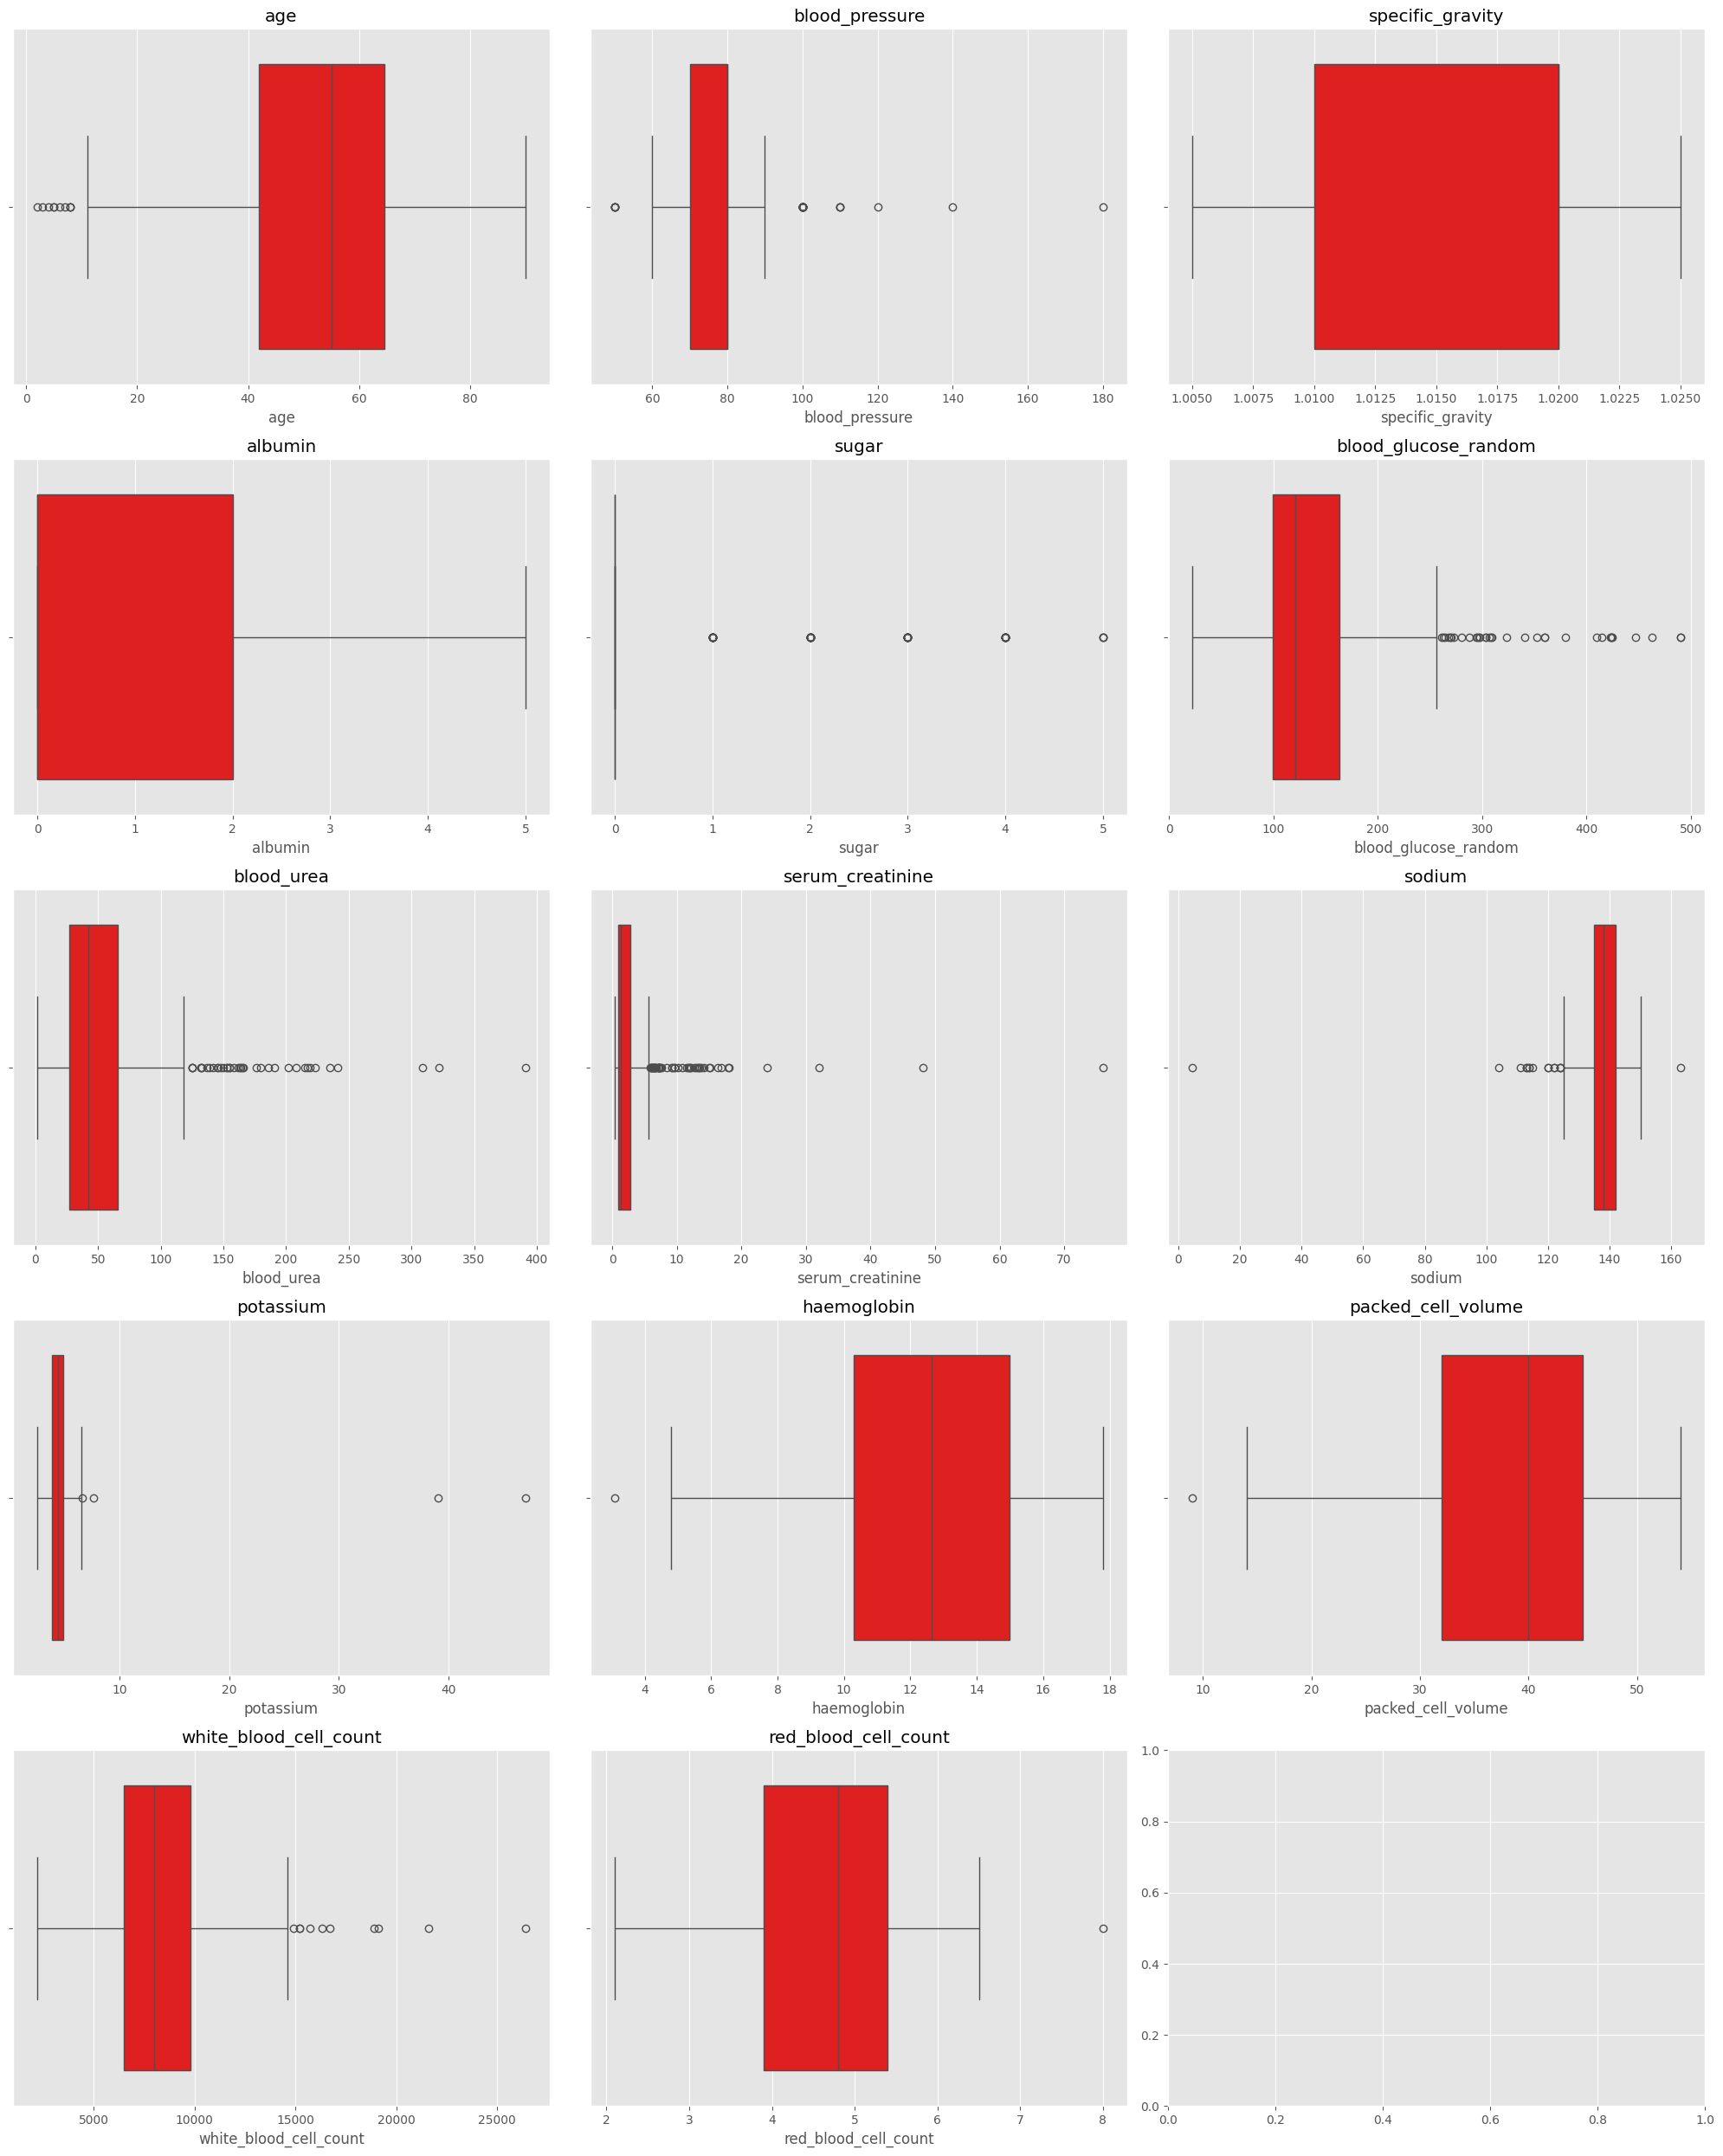

In [27]:
#outlier detection 
num_cols_length=len(num_cols)    # Counts the number of numerical columns.
n_rows=(num_cols_length//3)+(num_cols_length % 3>0)   # ensures there’s an extra row if the columns can’t evenly divide into groups of three.

fig,axes=plt.subplots(n_rows,3, figsize=(20,n_rows*5))  # Creates a grid of subplots with n_rows rows and 3 columns. and for easy viewing of each plot.


axes=axes.flatten()  # for easier iteration  Flattens the grid of axes into a 1D array,

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col],color='red',ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [28]:
outlier_results={}
for col in num_cols:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_fence=q1-1.5* iqr
    upper_fence=q3+ 1.5 *iqr
    outlier_results[col]=((df[col]<lower_fence) | (df[col]>upper_fence)).sum()


In [29]:
outlier_results

{'age': 10,
 'blood_pressure': 36,
 'specific_gravity': 0,
 'albumin': 0,
 'sugar': 61,
 'blood_glucose_random': 34,
 'blood_urea': 38,
 'serum_creatinine': 51,
 'sodium': 16,
 'potassium': 4,
 'haemoglobin': 1,
 'packed_cell_volume': 1,
 'white_blood_cell_count': 10,
 'red_blood_cell_count': 1}

In [30]:
#  dictionary keys should become the index (row labels) of the DataFrame

pd.DataFrame.from_dict(outlier_results,orient='index',columns=['Outlier count'])  

Outlier count
age                                10
blood_pressure                     36
specific_gravity                    0
albumin                             0
sugar                              61
blood_glucose_random               34
blood_urea                         38
serum_creatinine                   51
sodium                             16
potassium                           4
haemoglobin                         1
packed_cell_volume                  1
white_blood_cell_count             10
red_blood_cell_count                1

In [31]:
# imputing NA values  to remove null values present 
for features in num_cols:
    q1=df[features].quantile(0.25)
    q3=df[features].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    if df[df[features]>upper].any(axis=None):
        df.loc[df[features]>upper,features]=upper
    if df[df[features]<lower].any(axis=None):
        df.loc[df[features]<lower,features]=lower
    else:
        print(features,'No')

specific_gravity No
albumin No
sugar No
blood_glucose_random No
blood_urea No
serum_creatinine No
potassium No
white_blood_cell_count No
red_blood_cell_count No


In [32]:
outlier_results={}
for col in num_cols:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_fence=q1-1.5* iqr
    upper_fence=q3+ 1.5 *iqr
    outlier_results[col]=((df[col]<lower_fence) | (df[col]>upper_fence)).sum()

pd.DataFrame.from_dict(outlier_results,orient='index',columns=['out count'])


out count
age                             0
blood_pressure                  0
specific_gravity                0
albumin                         0
sugar                           0
blood_glucose_random            0
blood_urea                      0
serum_creatinine                0
sodium                          0
potassium                       0
haemoglobin                     0
packed_cell_volume              0
white_blood_cell_count          0
red_blood_cell_count            0

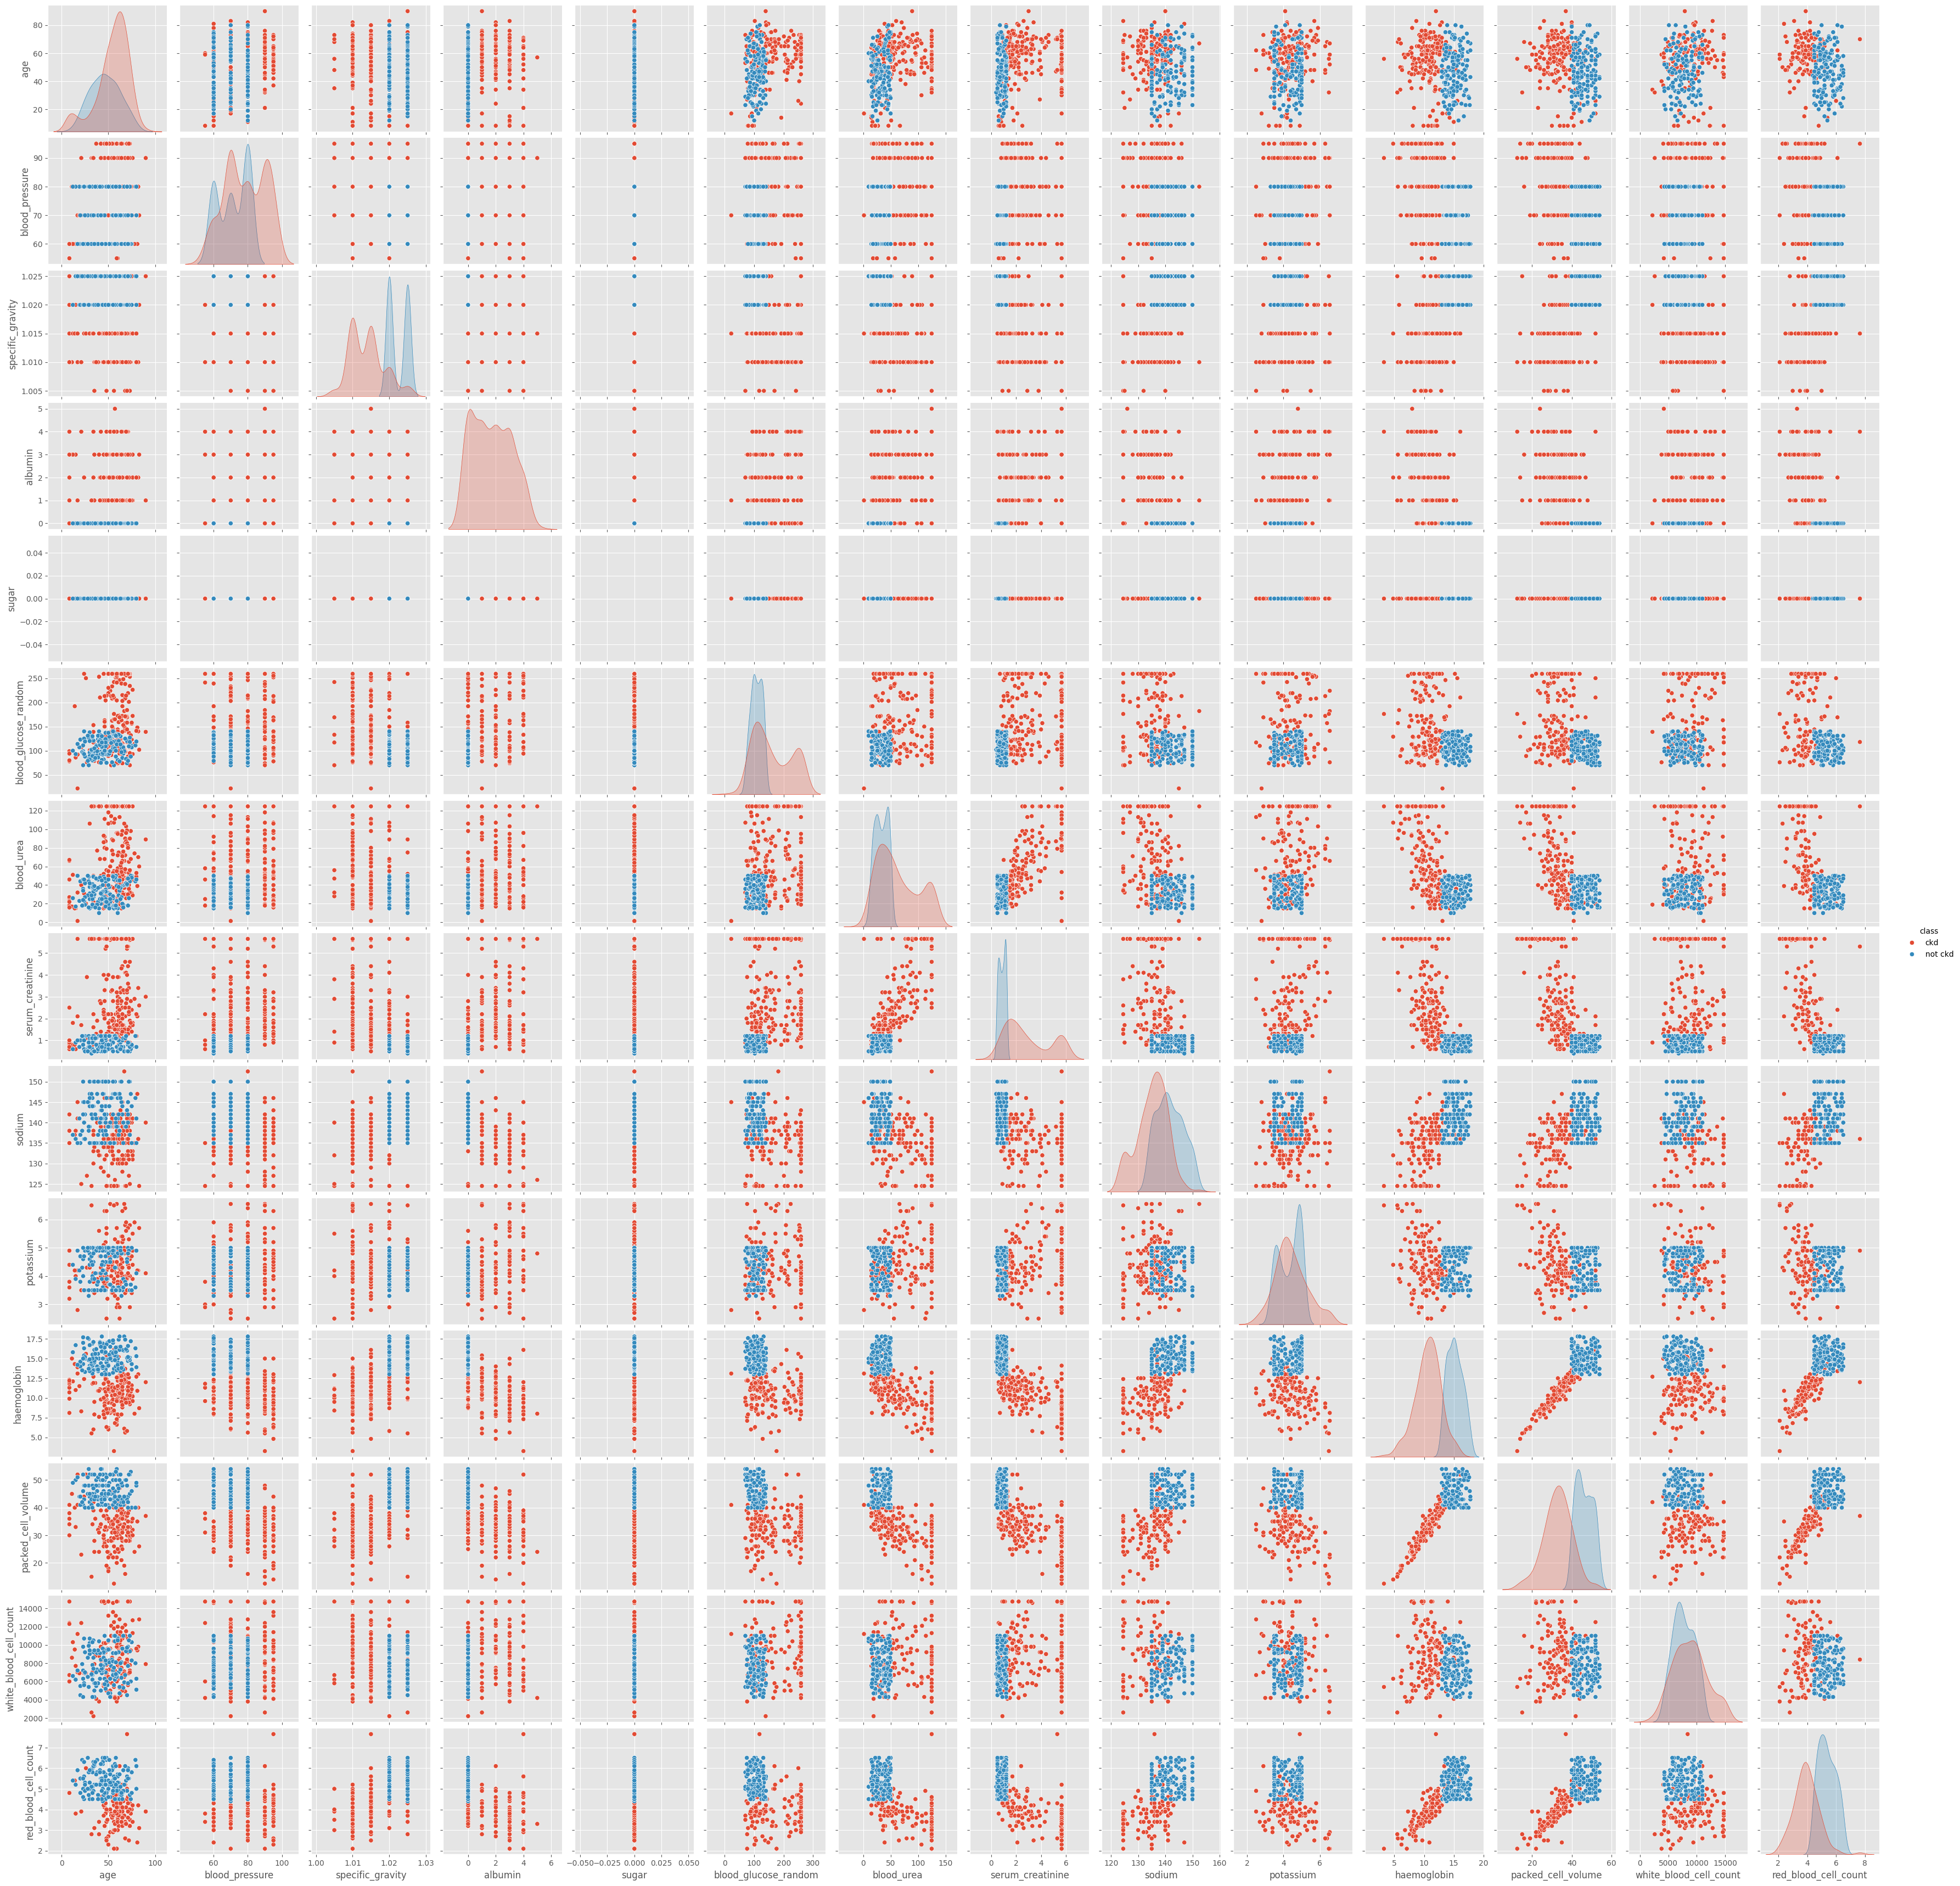

In [33]:
sns.pairplot(df[num_cols+ ['class']],hue='class')

# Step 2: Handling Null values and correlation

In [34]:
pip install fancyimpute

Note: you may need to restart the kernel to use updated packages.


In [35]:
from fancyimpute import IterativeImputer


In [110]:
mice_imputer=IterativeImputer()

In [111]:
pearson_corr['packed_cell_volume'].loc[pearson_corr['packed_cell_volume'].abs()>0.5]  # only correlation>0.5 is picked and null values for mice imputation 

specific_gravity        0.603560
albumin                -0.611891
blood_urea             -0.607621
haemoglobin             0.895382
packed_cell_volume      1.000000
red_blood_cell_count    0.791625
Name: packed_cell_volume, dtype: float64

In [38]:
imputed_cols=[]
for col in num_cols:                         # imputation of only correlated columns 
    if col in imputed_cols:
        continue

    correlated_cols=pearson_corr[col].loc[pearson_corr[col].abs()>0.5].index.to_list()

    if correlated_cols:
        correlated_cols_to_impute=[c for c in correlated_cols if c not in imputed_cols]

        if correlated_cols_to_impute:
            imputation_data=df[correlated_cols_to_impute].copy()
            imputation_data=mice_imputer.fit_transform(imputation_data)
            df[correlated_cols_to_impute]=imputation_data
            imputed_cols.extend(correlated_cols_to_impute)
    

In [39]:
imputed_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'haemoglobin',
 'packed_cell_volume',
 'red_blood_cell_count',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'white_blood_cell_count']

In [40]:
set(num_cols)-set(imputed_cols)   # to check remaining column which are not correlated

set()

In [41]:
remaining_cat=df.columns[df.isnull().any()].to_list()
remaining_cat

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia']

In [42]:
for col in remaining_cat:                # filling na with mode 
    if col in cat_cols:
        df[col]=df[col].fillna(df[col].mode()[0])

In [43]:
df.isnull().sum().sort_values(ascending=False)

age                        0
potassium                  0
aanemia                    0
peda_edema                 0
appetite                   0
coronary_artery_disease    0
diabetes_mellitus          0
hypertension               0
red_blood_cell_count       0
white_blood_cell_count     0
packed_cell_volume         0
haemoglobin                0
sodium                     0
blood_pressure             0
serum_creatinine           0
blood_urea                 0
blood_glucose_random       0
bacteria                   0
pus_cell_clumps            0
pus_cell                   0
red_blood_cells            0
sugar                      0
albumin                    0
specific_gravity           0
class                      0
dtype: int64

# outlier handling:

In [44]:
for features in num_cols:
    q1=df[features].quantile(0.25)
    q3=df[features].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    if df[df[features]>upper].any(axis=None):
        df.loc[df[features]>upper,features]=upper
    if df[df[features]<lower].any(axis=None):
        df.loc[df[features]<lower,features]=lower
    else:
        print(features,'No')

blood_pressure No
specific_gravity No
albumin No
sugar No
blood_urea No
serum_creatinine No
red_blood_cell_count No


# create data sets 

In [45]:
high_corr=[(col1,col2) for col1 in num_cols for col2 in num_cols if col1 != col2 and pearson_corr.loc[col1,col2]>0.7]
high_corr

[('sugar', 'blood_glucose_random'),
 ('blood_glucose_random', 'sugar'),
 ('haemoglobin', 'packed_cell_volume'),
 ('haemoglobin', 'red_blood_cell_count'),
 ('packed_cell_volume', 'haemoglobin'),
 ('packed_cell_volume', 'red_blood_cell_count'),
 ('red_blood_cell_count', 'haemoglobin'),
 ('red_blood_cell_count', 'packed_cell_volume')]

In [46]:
df_wo_corr=df.copy(deep=True)          #without correlation dataframe

In [47]:
for col1,col2 in high_corr:
    if col1 in df_wo_corr.columns:
        df_wo_corr=df_wo_corr.drop(columns=[col1])

In [48]:
print('new',df_wo_corr.columns.tolist())         # without correlation
print('old',df.columns.tolist())                  # with and without correlation 

new ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'white_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']
old ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']


In [49]:
print('new', len(df_wo_corr.columns.to_list()))
print('old',len(df.columns.tolist()))

new 20
old 25


In [50]:
cat_cols_wo_corr=[col for col in df_wo_corr.columns if df[col].dtype=='object']   # without correlation
num_cols_wo_corr=[col for col in df_wo_corr.columns if df[col].dtype!='object']


# features engineering 

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.feature_selection import chi2, mutual_info_classif, SelectKBest
from sklearn.preprocessing import LabelEncoder

In [52]:
for col in cat_cols:
    print(f'{col} has  {df[col].nunique()}')

red_blood_cells has  2
pus_cell has  2
pus_cell_clumps has  2
bacteria has  2
hypertension has  2
diabetes_mellitus has  2
coronary_artery_disease has  2
appetite has  2
peda_edema has  2
aanemia has  2
class has  2


In [53]:
le=LabelEncoder()

for col in cat_cols_wo_corr:
    df_wo_corr[col]=le.fit_transform(df_wo_corr[col])


In [54]:
cat_cols_wo_corr.remove('class')

In [55]:
x=df_wo_corr.drop(columns=['class'])

In [56]:
y=df_wo_corr['class']

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [58]:
encoder=OneHotEncoder(sparse_output=False,drop='first')
x_train_encoded=encoder.fit_transform(x_train[cat_cols_wo_corr])
x_test_encoded=encoder.fit_transform(x_test[cat_cols_wo_corr])

In [59]:
x_train_encoded_df=pd.DataFrame(x_train_encoded,columns=encoder.get_feature_names_out(cat_cols_wo_corr))
x_test_encoded_df=pd.DataFrame(x_test_encoded,columns=encoder.get_feature_names_out(cat_cols_wo_corr))

In [60]:
x_train_encoded_df.shape

(320, 10)

In [61]:
x_test_encoded_df.shape

(80, 10)

In [62]:
scaler=RobustScaler()
x_train_scaled=scaler.fit_transform(x_train[num_cols_wo_corr])
x_test_scaled=scaler.transform(x_test[num_cols_wo_corr])

In [63]:
# Create DataFrames from the scaled features
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=num_cols_wo_corr)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=num_cols_wo_corr)

In [64]:
x_train_processed = pd.concat([x_train_scaled_df.reset_index(drop=True), x_train_encoded_df.reset_index(drop=True)], axis=1)
x_test_processed = pd.concat([x_test_scaled_df.reset_index(drop=True), x_test_encoded_df.reset_index(drop=True)], axis=1)

In [65]:
x_train_processed.shape

(320, 19)

In [66]:
k=10
selector = SelectKBest(score_func=mutual_info_classif, k=k)         # selecting k best features
x_train_kbest= selector.fit_transform(x_train_processed, y_train)

In [67]:
selected_features= x_train_processed.columns[selector.get_support(indices=True)]

In [68]:
selected_features

Index(['blood_pressure', 'specific_gravity', 'albumin', 'blood_urea',
       'serum_creatinine', 'sodium', 'potassium', 'hypertension_1',
       'diabetes_mellitus_1', 'aanemia_1'],
      dtype='object')

In [69]:
x_train_kbest_df= x_train_processed[selected_features].copy(deep=True)

In [70]:
x_train_kbest_df.shape

(320, 10)

In [71]:
x_test_kbest_df= x_test_processed[selected_features].copy(deep=True)

In [72]:
x_test_kbest_df.shape

(80, 10)

# PCA

In [73]:
from sklearn.decomposition import PCA

In [74]:
n_components = 10
 
pca= PCA(n_components=10)
x_train_pca= pca.fit_transform(x_train_processed)
x_test_pca= pca.fit_transform(x_test_processed)

In [75]:
# Create DataFrames for PCA-transformed data
x_train_pca_df = pd.DataFrame(x_train_pca, columns=[f'PC{i+1}' for i in range(n_components)])
x_test_pca_df = pd.DataFrame(x_test_pca, columns=[f'PC{i+1}' for i in range(n_components)])

print("Shape of training set with PCA-reduced features:", x_train_pca_df.shape)
print("Shape of test set with PCA-reduced features:", x_test_pca_df.shape)


Shape of training set with PCA-reduced features: (320, 10)
Shape of test set with PCA-reduced features: (80, 10)


In [76]:
x_train_pca_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    2.193088 -2.115176 -2.232480  0.604572 -0.537518 -0.387848  1.463190   
1    0.264233  1.781236 -0.849110  1.411795  0.559652  0.221443 -0.982886   
2    1.009690 -1.274879  1.311156 -0.741706  1.595755  0.433397 -0.777654   
3   -0.990852  0.643338 -0.544289  0.463592  0.312537  1.269927 -1.122522   
4   -1.564834  0.742152 -0.530518 -0.026948 -0.954329  0.612192 -0.070805   
..        ...       ...       ...       ...       ...       ...       ...   
315  0.834308 -1.487633  1.797587  1.315611 -0.981462 -0.216448 -0.460828   
316  3.889252  0.048492 -1.033828 -1.084268 -0.600564 -0.257966 -0.669344   
317 -1.678807  0.935848 -0.034897 -0.474067 -1.185297 -0.058641  0.220210   
318 -2.086470  1.061914 -0.167545  0.168520 -0.879490 -0.757583  0.630453   
319 -1.388153 -1.192878  0.111453 -0.640158 -1.011722  0.327852  0.273079   

          PC8       PC9      PC10  
0   -0.047834 -0.370971  0.827386  
1    0.261339  0.769460 -0.581110  
2   -0.622905 -0.425291  0.172138  
3    0.199776  0.005346  0.163662  
4   -0.167543  0.117861 -0.087888  
..        ...       ...       ...  
315 -0.709094  0.173196 -0.800777  
316 -0.534737  0.420968 -0.008766  
317  0.185228  0.341847 -0.165991  
318 -0.101510  0.083529 -0.089095  
319 -1.185664 -0.335730  0.052848  

[320 rows x 10 columns]

In [77]:
pca.explained_variance_.sum()   #  the total variance captured by all principal components combined. 

8.27231667507463

# Modeling

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [102]:
def evaluate_model(model,x_train,x_test,y_train,y_test,model_name):
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    # train and test accuracy
    train_acc=accuracy_score(y_train,y_train_pred)
    test_acc=accuracy_score(y_test,y_test_pred)

    # print accuracy and classification report 
    print(f'\n{model_name}-Train Accuracy: {train_acc:.2f}, Test Accuracy:{test_acc:.2f}')
    print(f'Classification Report (Test):\n{classification_report(y_test, y_test_pred)}')

    return train_acc, test_acc
    

In [103]:
# Function to plot Roc-AUC  curve 
def  plot_roc_auc(model,x_test,y_test,model_name):
    y_score=model.predict_proba(x_test)[:,1]   
    fpr,tpr,_ =roc_curve(y_test,y_score)
    roc_auc=auc(fpr,tpr)

    plt.plot(fpr,tpr,label=f'{model_name} (AUC={roc_auc:.2f})')
    plt.plot([0,1],[0,1],'k--',lw=2)  # diagonal line for reference 
    plt.xlabel('False positive Rate')
    plt.ylabel('True positive rate')
    plt.title(f'ROC-AUC curve for {model_name}')
    plt.legend()
    plt.show()

In [104]:
# Function to plot combined ROC-AUC curves for multiple models
def plot_combined_roc_auc(models, X_test, y_test, section_title):
    plt.figure(figsize=(10, 8))
    for model_name, model in models.items():
        y_score = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for reference
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Combined ROC-AUC Curve for {section_title}')
    plt.legend()
    plt.show()


*** Running Models on x_train_processed and x_test_processed ***

Logistic Regression-Train Accuracy: 0.99, Test Accuracy:0.97
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.93      1.00      0.97        28

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



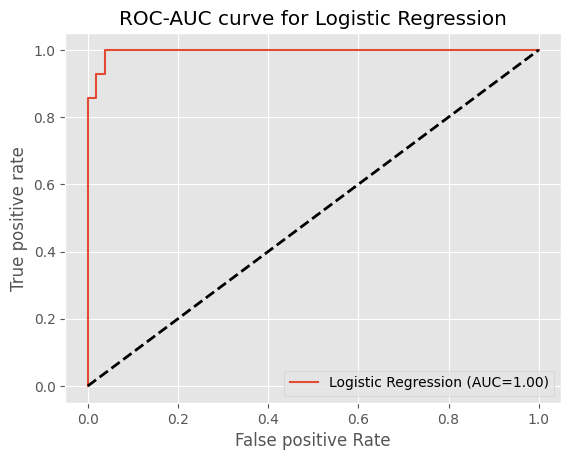


Support Vector Classifier-Train Accuracy: 0.99, Test Accuracy:0.97
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.93      1.00      0.97        28

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



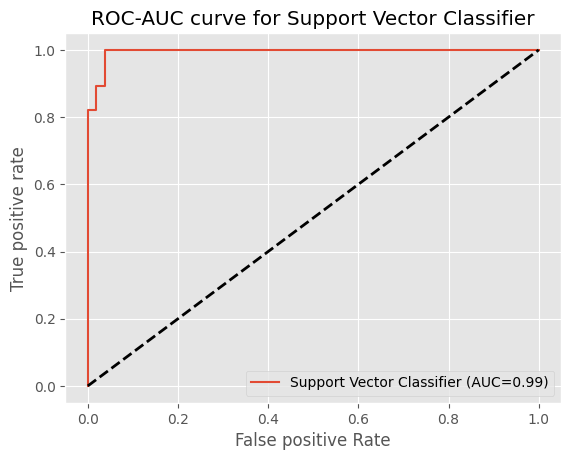


Decision Tree-Train Accuracy: 1.00, Test Accuracy:0.95
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        52
           1       0.93      0.93      0.93        28

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



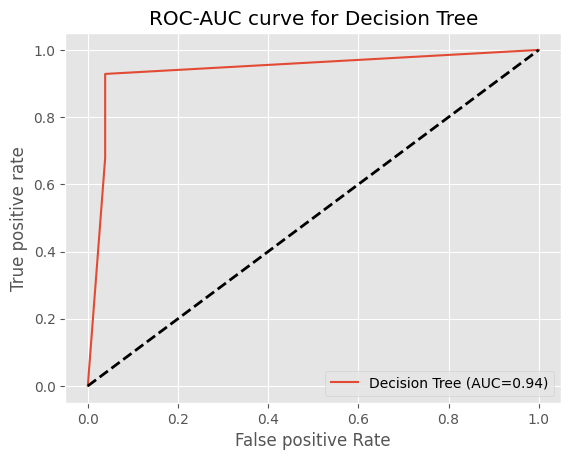


Random Forest-Train Accuracy: 1.00, Test Accuracy:0.99
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



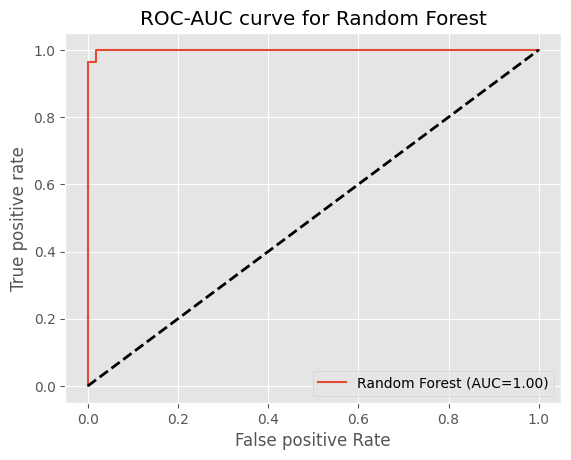


Gradient Boosting-Train Accuracy: 1.00, Test Accuracy:0.97
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



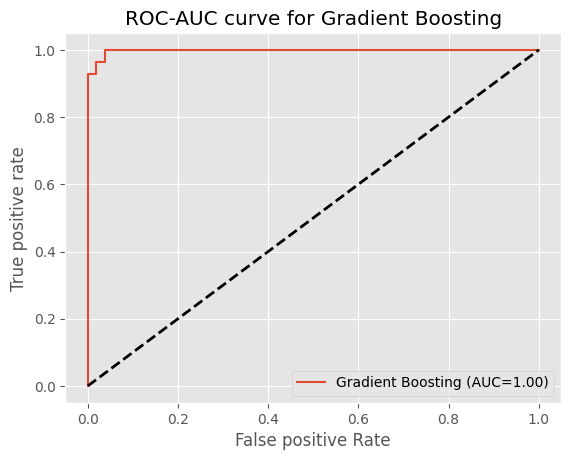


XGBoost-Train Accuracy: 1.00, Test Accuracy:0.96
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        52
           1       0.93      0.96      0.95        28

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



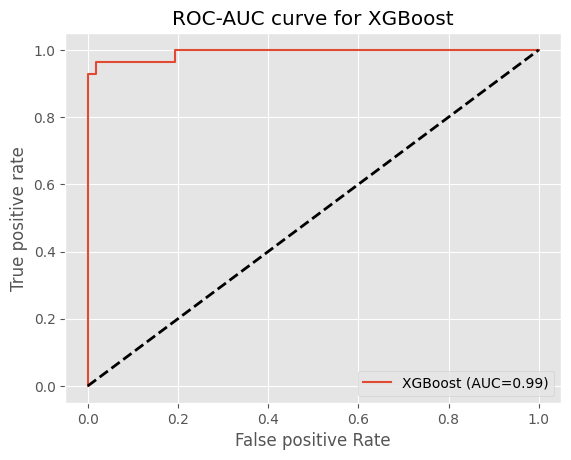

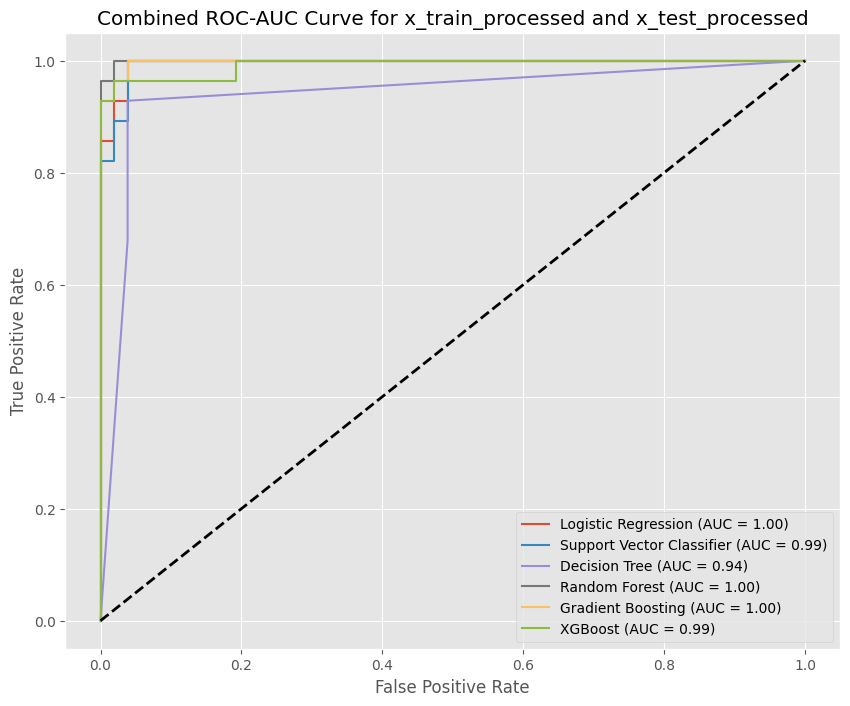

In [107]:
models={
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

param_grids= {
    'Logistic Regression': {'C': [0.1,1,10], 'solver': ['lbfgs','liblinear']},
    'Support Vector Classifier': {'C': [0.1,1,10],'kernel': ['linear','rbf']},
    'Decision Tree': {'max_depth':[5,10,15], 'min_samples_split': [2,5,10]},
    'Random Forest': {'n_estimators':[50,100], 'max_depth': [10,15],'min_samples_split': [2, 5]},
    "Gradient Boosting": {'learning_rate': [0.01, 0.1], 'n_estimators': [50, 100]},
    "XGBoost": {'learning_rate': [0.01, 0.1], 'n_estimators': [50, 100], 'max_depth': [3, 5]}
}


trained_models={}
print('\n*** Running Models on x_train_processed and x_test_processed ***')
for model_name,model in models.items():
    grid=GridSearchCV(model,param_grids[model_name],cv=3, scoring='accuracy',n_jobs=-1)
    grid.fit(x_train_processed,y_train)
    best_model=grid.best_estimator_
    trained_models[model_name]= best_model


    train_acc,test_acc=evaluate_model(best_model,x_train_processed,x_test_processed, y_train, y_test, model_name)
    plot_roc_auc(best_model, x_test_processed,y_test,model_name)


#plot combined  ROC-AUC  for all models in section 1
plot_combined_roc_auc(trained_models,x_test_processed,y_test,'x_train_processed and x_test_processed')
